# STOCK MARKET CLUSTERING

### ABSTRACT

Stock market is one of the most dynaminc and volatile source of data.
The data is genereated every second as the money never sleeps. The change in the values of stocks are a result of various measures and sentiments of the people.
In this project, I've tried to cluster the stocks of National Stock Exchange (NSE) India in Top gains and Loosers over a period of time.

This is the first version of the project, I will be refining the project over time.

### Workflow

The project runs in the following way:

Importing the necessary Libaries

In [1]:
# preprocessing
import math
import random
import pandas as pd
import numpy as np
from datetime import date 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
import preprocessing
# visualization
import matplotlib.pyplot as plt 
from pylab import *
# neural network
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import LSTM 

Using TensorFlow backend.


### National Stock Exchange (NSE) Data

The National Stock Exchange of India Limited is the leading stock exchange of India, located in Mumbai. 

NSE official website 
https://www.nseindia.com/

NSE SYMBOLS list:
https://www.nseindia.com/products/content/derivatives/equities/fo_underlying_home.htm

Using two libraries for data calling purpose
1. NSEpy <br>
    https://nsepy.readthedocs.io/en/latest/<br>
    nsepy is used to retrive the data of specific stock<br><br>
2. NSETOOLS
    https://nsetools.readthedocs.io/en/latest/<br>
    nsetools is used to get the list of stock in NSE

In [2]:
import nsepy as nse 
from nsetools import Nse
nsel = Nse()
stock_list = nsel.get_stock_codes()
stock_list= {v: k for k, v in stock_list.items()}

In [3]:
for each_stock in stock_list:
    print(each_stock)

NAME OF COMPANY
20 Microns Limited
21st Century Management Services Limited
3i Infotech Limited
3M India Limited
3P Land Holdings Limited
5Paisa Capital Limited
63 moons technologies limited
8K Miles Software Services Limited
A2Z Infra Engineering Limited
Aarti Drugs Limited
Aarti Industries Limited
Aarvee Denims & Exports Limited
Aavas Financiers Limited
Aban Offshore Limited
ABB India Limited
Abbott India Limited
Aditya Birla Capital Limited
Aditya Birla Fashion and Retail Limited
ABG Shipyard Limited
ABM International Limited
ACC Limited
Accelya Kale Solutions Limited
Action Construction Equipment Limited
Adani Enterprises Limited
Adani Gas Limited
Adani Green Energy Limited
Adani Ports and Special Economic Zone Limited
Adani Power Limited
Adani Transmission Limited
ADF Foods Limited
Adhunik Metaliks Limited
Adhunik Industries Limited
Adlabs Entertainment Limited
Ador Welding Limited
Adroit Infotech Limited
Allied Digital Services Limited
Advani Hotels & Resorts (India) Limited
Adva

In [7]:
number_of_company = int(input('Entert the number of company:\t'))
company_list =[]
for _ in range(number_of_company):
    name = input('Enter the Company to Predict\t:\t')
    company_list.append(name)

Entert the number of company:	4
Enter the Company to Predict	:	Brigade Enterprises Limited
Enter the Company to Predict	:	Godrej Properties Limited
Enter the Company to Predict	:	ITC Limited
Enter the Company to Predict	:	Reliance Industries Limited


In [9]:
numbered = list(company_list)

Collecting over 19 years of data, for the model.
The data is daywise.
If a company is not listed in NSE at the year 2000, the data is collected from the day it got listed.

In [10]:
stock_data = list(company_list)
for i in range(number_of_company):
    stock_data[i] = nse.get_history(symbol=company_list[i], start=date(2000,1,1), end=date(2019,3,31))


## Preprocessing

Since only Open High Low Close, attributes are only used in prediction, we remove the other attributes in the dataframes

In [11]:
for each_stock in stock_data:
    each_stock.drop(['Trades','Deliverable Volume','%Deliverble','VWAP','Turnover','Last','Prev Close','Series','Symbol'], axis =1,inplace =True)

Adding feature, Change which gives the Volatility of a stock, more the volatility better for day trading.

In [12]:
for each_stock in stock_data:
    each_stock['Change'] = each_stock['Close']-each_stock['Open']

Adding feature, Gains. It is a categorical feature, representing the grwoth or loss in each day.<br>
Gain = 1<br>
Neutral =0<br>
Loss =-1<br>

In [13]:
for each_stock in stock_data:
    each_stock.loc[each_stock.Change >0, 'Gains'] = 1 
    each_stock.loc[each_stock.Change <0, 'Gains'] = -1 
    each_stock.loc[each_stock.Change ==0, 'Gains'] = 0 

Printing the first 5 values and description of data for each stock's dataframe.

In [16]:
print(numbered[0])
stock_data[0].head()

Brigade Enterprises Limited


,Open,High,Low,Close,Volume,Change,Gains
Date,,,,,,,
2007-12-31,430.0,489.9,355.15,379.90,6688161,-50.10,-1.0
2008-01-01,385.8,428.0,381.00,399.75,3384279,13.95,1.0
2008-01-02,418.0,418.0,391.05,397.00,1566650,-21.00,-1.0
2008-01-03,402.0,407.0,373.00,388.30,725929,-13.70,-1.0
2008-01-04,388.0,395.0,380.10,382.95,355017,-5.05,-1.0


In [17]:
print(numbered[0])
stock_data[0].describe()

Brigade Enterprises Limited


,Open,High,Low,Close,Change,Gains
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000
mean,135.737231,139.101399,132.606600,135.327421,-0.409810,-0.125179
std,71.783501,73.242107,70.040907,71.329308,4.639049,0.986328
min,28.350000,29.750000,27.900000,29.050000,-50.100000,-1.000000
25%,69.875000,71.900000,67.587500,69.550000,-2.150000,-1.000000
50%,136.500000,139.475000,134.000000,136.225000,-0.350000,-1.000000
75%,168.000000,172.812500,164.275000,168.250000,1.262500,1.000000
max,430.000000,489.900000,391.050000,399.750000,68.250000,1.000000


In [18]:
print(numbered[1])
stock_data[1].head()

Godrej Properties Limited


,Open,High,Low,Close,Volume,Change,Gains
Date,,,,,,,
2010-01-05,511.00,586.80,502.15,537.25,8707481,26.25,1.0
2010-01-06,537.00,546.60,524.55,527.20,1170320,-9.80,-1.0
2010-01-07,529.00,543.90,526.00,536.90,823422,7.90,1.0
2010-01-08,533.00,538.25,517.15,520.30,235521,-12.70,-1.0
2010-01-11,526.85,529.45,510.00,520.30,270664,-6.55,-1.0


In [19]:
print(numbered[1])
stock_data[1].describe()

Godrej Properties Limited


,Open,High,Low,Close,Change,Gains
count,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000
mean,497.720374,506.917392,489.327166,496.991032,-0.729343,-0.122333
std,186.596031,190.237803,183.211958,186.348061,11.684642,0.991827
min,155.100000,156.500000,154.000000,155.100000,-82.800000,-1.000000
25%,322.650000,327.400000,316.550000,321.900000,-5.950000,-1.000000
50%,526.850000,535.000000,517.200000,524.750000,-1.050000,-1.000000
75%,660.000000,671.000000,649.000000,658.750000,3.800000,1.000000
max,910.000000,920.000000,857.700000,882.050000,105.550000,1.000000


In [20]:
print(numbered[2])
stock_data[2].head()

ITC Limited


,Open,High,Low,Close,Volume,Change,Gains
Date,,,,,,,
2000-01-03,694.00,708.50,675.0,708.50,562715,14.50,1.0
2000-01-04,714.00,729.00,694.3,712.35,712637,-1.65,-1.0
2000-01-05,716.25,758.90,660.0,726.20,1382149,9.95,1.0
2000-01-06,741.00,784.30,741.0,784.30,721618,43.30,1.0
2000-01-07,832.40,847.05,824.0,847.05,231209,14.65,1.0


In [21]:
print(numbered[2])
stock_data[2].describe()

ITC Limited


,Open,High,Low,Close,Volume,Change,Gains
count,4794.000000,4794.000000,4794.000000,4794.000000,4.794000e+03,4794.000000,4794.000000
mean,441.841980,448.239132,435.101502,441.525031,5.360856e+06,-0.316948,-0.031289
std,338.266188,343.478454,333.221730,338.160740,5.759649e+06,11.675573,0.997316
min,115.000000,116.200000,114.400000,115.450000,6.797000e+03,-125.850000,-1.000000
25%,204.425000,207.000000,201.562500,204.250000,7.175955e+05,-3.300000,-1.000000
50%,295.000000,298.325000,291.275000,295.100000,4.615571e+06,-0.150000,-1.000000
75%,661.700000,672.162500,651.425000,660.362500,7.651420e+06,2.950000,1.000000
max,1946.000000,1964.800000,1916.300000,1940.100000,1.494797e+08,120.050000,1.000000


In [22]:
print(numbered[3])
stock_data[3].head()

Reliance Industries Limited


,Open,High,Low,Close,Volume,Change,Gains
Date,,,,,,,
2000-01-03,237.50,251.70,237.50,251.70,4456424,14.20,1.0
2000-01-04,258.40,271.85,251.30,271.85,9487878,13.45,1.0
2000-01-05,256.65,287.90,256.65,282.50,26833684,25.85,1.0
2000-01-06,289.00,300.70,289.00,294.35,15682286,5.35,1.0
2000-01-07,295.00,317.90,293.00,314.55,19870977,19.55,1.0


In [23]:
print(numbered[3])
stock_data[3].describe()

Reliance Industries Limited


,Open,High,Low,Close,Volume,Change,Gains
count,4794.000000,4794.000000,4794.000000,4794.000000,4.794000e+03,4794.000000,4794.000000
mean,944.256738,957.775021,929.414956,943.170526,4.724125e+06,-1.086212,-0.044639
std,548.643259,558.460231,536.336545,547.242185,3.305530e+06,25.884257,0.998272
min,205.500000,219.500000,197.150000,203.200000,5.282000e+04,-351.250000,-1.000000
25%,539.000000,545.000000,531.225000,537.262500,2.706354e+06,-9.037500,-1.000000
50%,894.975000,904.950000,884.200000,895.375000,3.928790e+06,-0.550000,-1.000000
75%,1080.000000,1094.325000,1065.300000,1079.037500,5.801718e+06,7.600000,1.000000
max,3298.000000,3298.000000,3141.300000,3220.850000,6.100024e+07,269.000000,1.000000


## Visualization 

Visualization of the Open values and Change over the years of all the listed stocks.

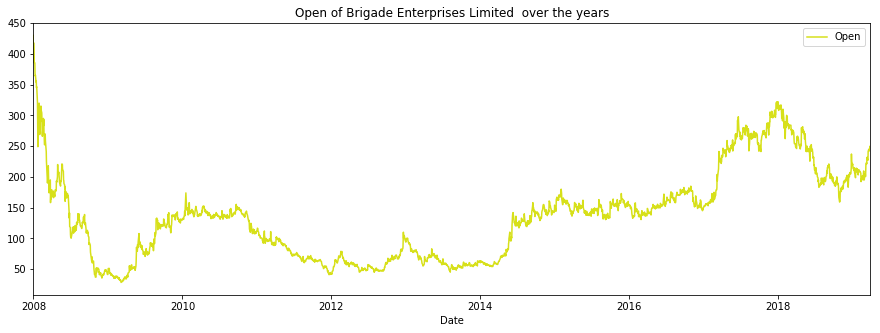

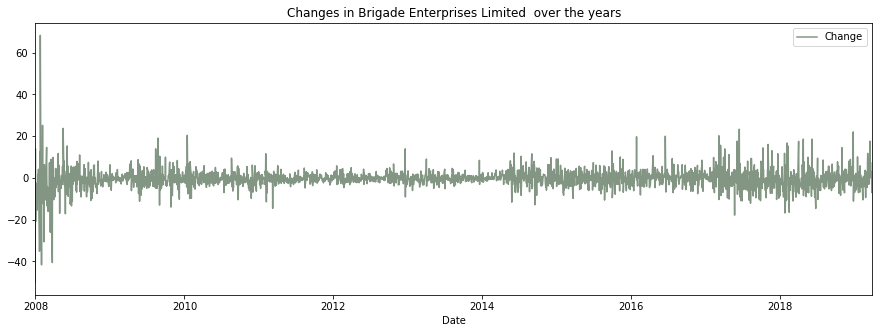

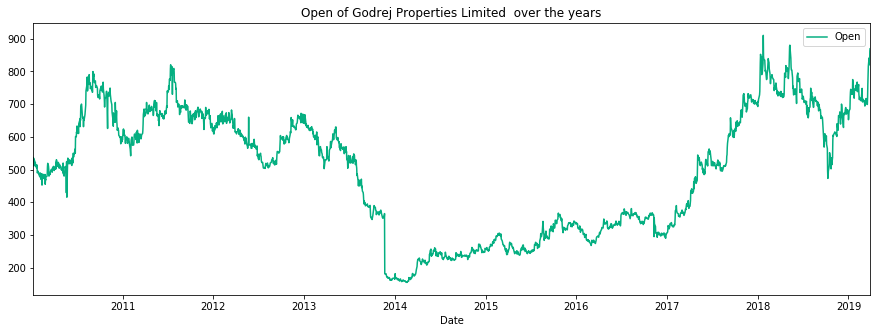

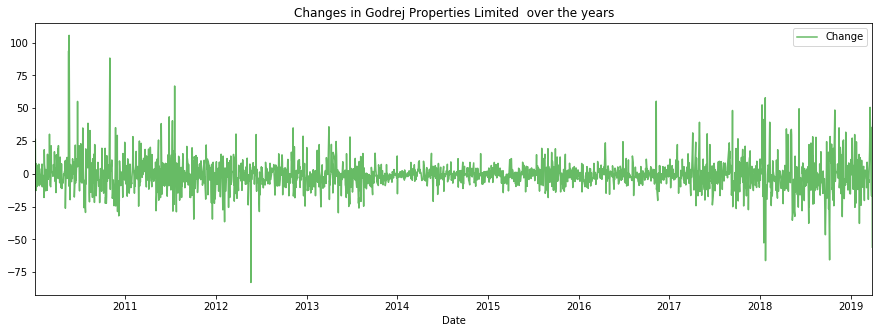

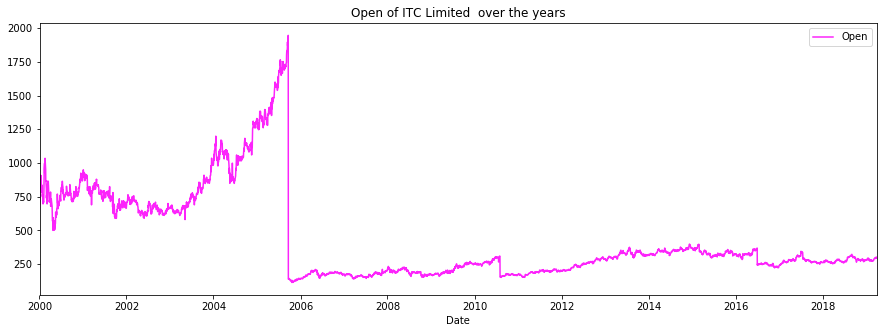

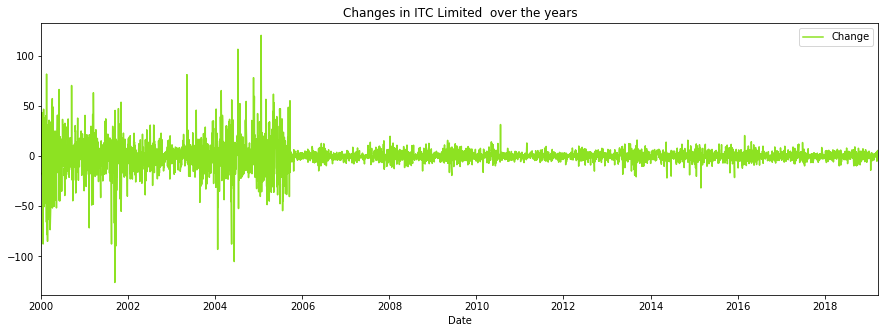

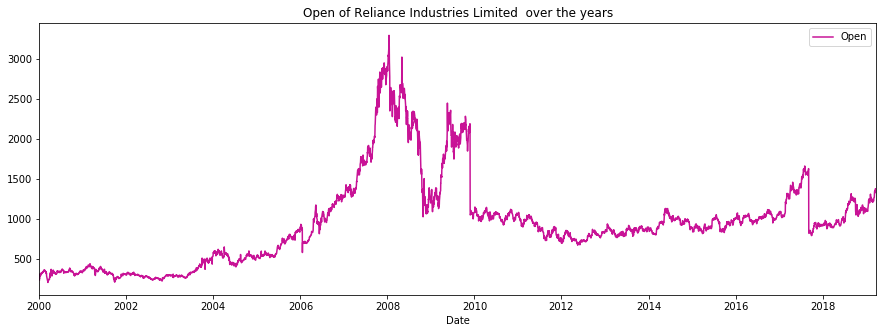

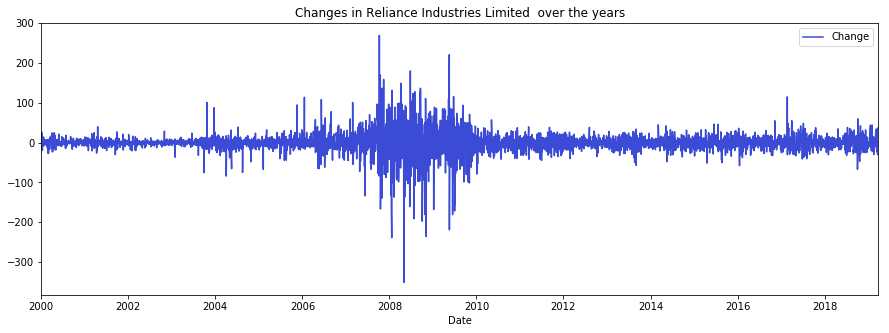

In [43]:
for each_stock,number in zip(stock_data,numbered):
    each_stock.plot(y ='Open',color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),figsize=(15,5),title='Open of ' +number+ '  over the years')
    each_stock.plot(y='Change',color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),figsize=(15,5),title ='Changes in '+ number+'  over the years')

Taking two major mesures for prediction.<br>
1. OHLC <br>
    An open-high-low-close chart is a type of chart typically used to illustrate movements in the price of a financial instrument over time.<br>
2. HLC - High Low Close graph<br>
3. Close - Closing price of each day

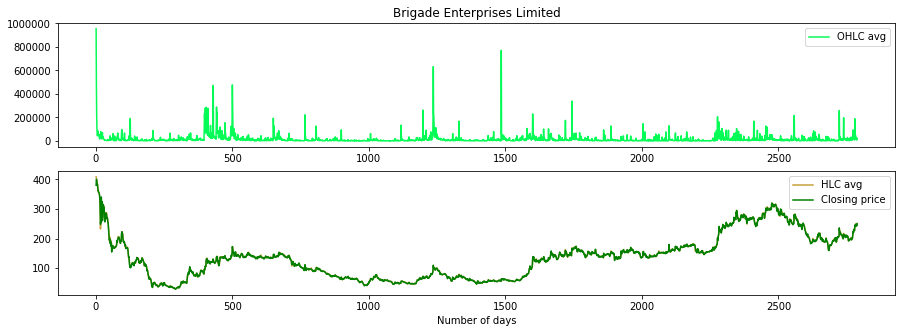

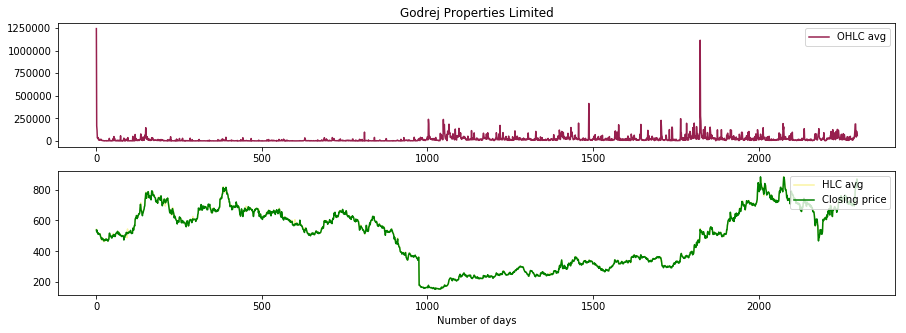

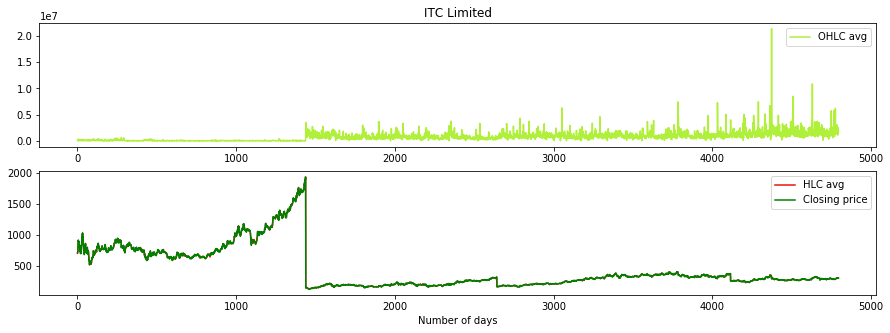

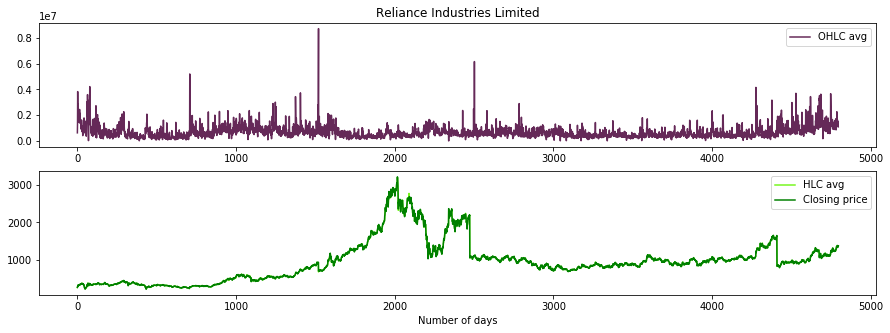

In [45]:
for each_stock,number in zip(stock_data,numbered):
    np.random.seed(7)
    obs = np.arange(1, len(each_stock) + 1, 1)
    OHLC_avg = each_stock.mean(axis = 1)
    HLC_avg = each_stock[['High', 'Low', 'Close']].mean(axis = 1)
    close_val= each_stock[['Close']]
    plt.figure(figsize=(15,5))
    subplot(2,1,1)
    plt.plot(obs, OHLC_avg,color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)), label = 'OHLC avg')
    plt.legend(loc = 'upper right')
    plt.title(number)
    subplot(2,1,2)
    plt.plot(obs, HLC_avg, color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)), label = 'HLC avg')
    plt.plot(obs, close_val, 'g', label = 'Closing price')
    plt.legend(loc = 'upper right')
    plt.xlabel('Number of days')
    print('\n\n\n')
    plt.show()

### Modeling 

Brigade enterprises limited
Epoch 1/5
 - 6s - loss: 0.0016
Epoch 2/5
 - 4s - loss: 2.1400e-04
Epoch 3/5
 - 4s - loss: 1.7504e-04
Epoch 4/5
 - 4s - loss: 1.5119e-04
Epoch 5/5
 - 4s - loss: 1.3359e-04




Train RMSE of Brigade Enterprises Limited 4.30
Test RMSE of Brigade Enterprises Limited 5.13


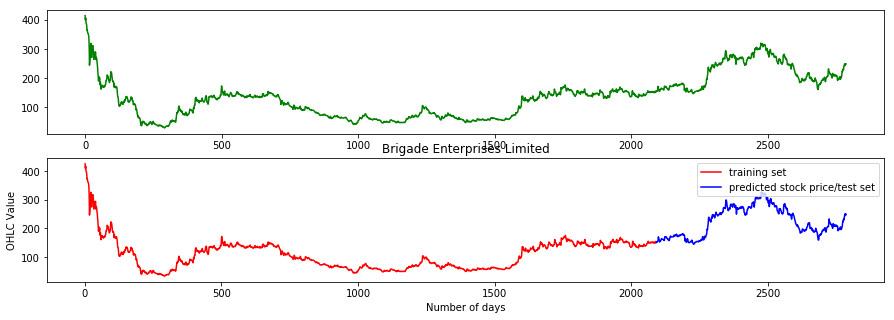

Last Day Value of Brigade Enterprises Limited 249.42347717285156
Next Day Value ofBrigade Enterprises Limited 256.8342590332031


Positive cluster




Godrej properties limited
Epoch 1/5
 - 5s - loss: 0.0060
Epoch 2/5
 - 4s - loss: 3.8748e-04
Epoch 3/5
 - 4s - loss: 3.3656e-04
Epoch 4/5
 - 4s - loss: 3.0295e-04
Epoch 5/5
 - 4s - loss: 2.7769e-04




Train RMSE of Godrej Properties Limited 11.79
Test RMSE of Godrej Properties Limited 14.72


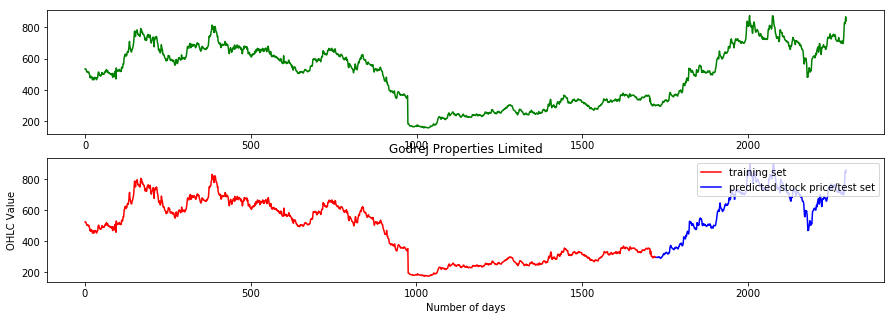

Last Day Value of Godrej Properties Limited 858.7581176757812
Next Day Value ofGodrej Properties Limited 884.938232421875


Positive cluster




Itc limited
Epoch 1/5
 - 9s - loss: 0.0026
Epoch 2/5
 - 10s - loss: 5.0294e-04
Epoch 3/5
 - 11s - loss: 4.3791e-04
Epoch 4/5
 - 8s - loss: 4.0066e-04
Epoch 5/5
 - 9s - loss: 3.7871e-04




Train RMSE of ITC Limited 34.49
Test RMSE of ITC Limited 6.38


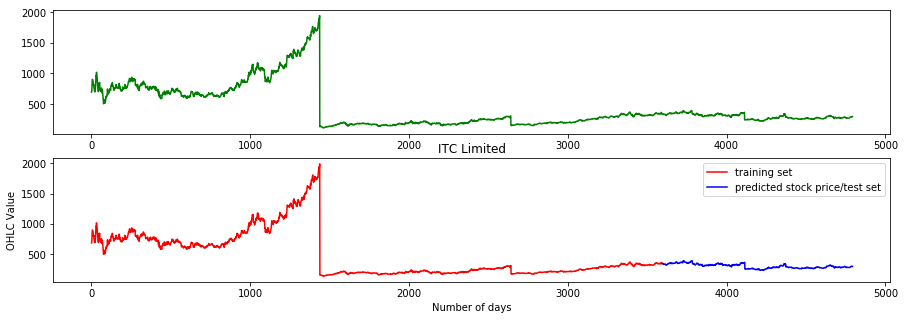

Last Day Value of ITC Limited 291.2975158691406
Next Day Value ofITC Limited 299.9196472167969


Positive cluster




Reliance industries limited
Epoch 1/5
 - 12s - loss: 0.0020
Epoch 2/5
 - 9s - loss: 2.2588e-04
Epoch 3/5
 - 9s - loss: 1.7794e-04
Epoch 4/5
 - 7s - loss: 1.5295e-04
Epoch 5/5
 - 7s - loss: 1.3738e-04




Train RMSE of Reliance Industries Limited 34.15
Test RMSE of Reliance Industries Limited 29.19


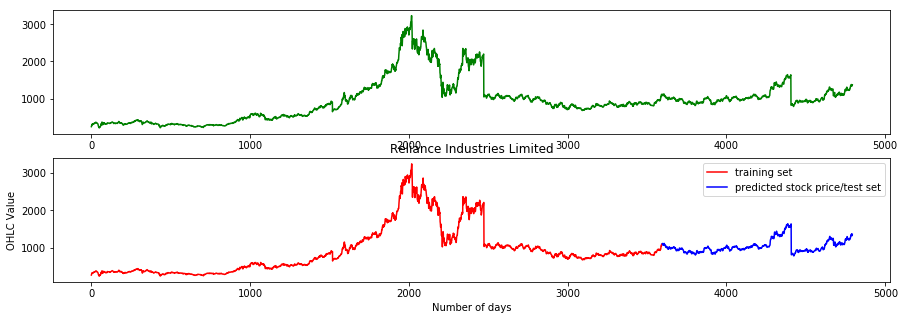

Last Day Value of Reliance Industries Limited 1352.5418701171875
Next Day Value ofReliance Industries Limited 1355.39794921875


Positive cluster






In [48]:
for each_stock,number in zip(stock_data,numbered):
# Selecting the necessary attributes for prediction 
    OHLC_avg = each_stock[['Open','High', 'Low', 'Close']].mean(axis = 1)
    HLC_avg = each_stock[['High', 'Low', 'Close']].mean(axis = 1)
    close_val= each_stock[['Close']]
    
# Converting to time series    
    OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    OHLC_avg = scaler.fit_transform(OHLC_avg)
    
# Splitting
    train_OHLC = int(len(OHLC_avg) * 0.75)
    test_OHLC = len(OHLC_avg) - train_OHLC
    train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET FOR TIME T, VALUES FOR TIME T+1
    trainX, trainY = preprocessing.new_dataset(train_OHLC, 1)
    testX, testY = preprocessing.new_dataset(test_OHLC, 1)

# Reshaping
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    step_size = 1

# LSTM MODEL
    model = Sequential()
    model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
    model.add(LSTM(16))
    model.add(Dense(1))
    model.add(Activation('linear'))
    print(number.capitalize())
# Training
    model.compile(loss='mean_squared_error', optimizer='adagrad') 
    model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

# Predicting 
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    print('\n\n\n')
    
    
# Output, Error and Plotting 
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])


# Trainng RMSE
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train RMSE of '+number+' %.2f' % (trainScore))

# Test RMSE
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test RMSE of '+number+' %.2f' % (testScore))

# Plotting
    trainPredictPlot = np.empty_like(OHLC_avg)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

    testPredictPlot = np.empty_like(OHLC_avg)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

    OHLC_avg = scaler.inverse_transform(OHLC_avg)


    plt.figure(figsize=(15,5))
    subplot(2,1,1)
    plt.plot(OHLC_avg, 'g', label = 'original dataset')
    subplot(2,1,2)
    plt.title(number)
    plt.plot(trainPredictPlot, 'r', label = 'training set')
    plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
    plt.legend(loc = 'upper right')
    plt.xlabel('Number of days')
    plt.ylabel('OHLC Value')
    plt.show()
    # PREDICT FUTURE VALUES
    last_val = testPredict[-1]
    last_val_scaled = last_val/last_val
    next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
    last_val = np.asscalar(last_val)
    next_val = np.asscalar(last_val*next_val)
    print ("Last Day Value of "+number, last_val)
    print ("Next Day Value of"+number, next_val)
    print('\n')
    if last_val > next_val:
        print('Negative cluster')
    else:
        print('Positive cluster')
    print('\n\n\n')
